In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# importing ploting libraries

import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
sns.set_style('white')
%matplotlib inline

In [ ]:
from google.colab import files

# Preprocessing

from google.colab import drive
drive.mount('/content/drive/Shareddrives/OPIM 5512/Data/movie.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
movies_dataset = pd.read_csv("/content/drive/Shareddrives/OPIM 5512/Data/movie.csv")

In [ ]:
movies_dataset.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies_dataset['year_released']=movies_dataset['title'].str[-5:-1]
movies_dataset.head()

,movieId,title,genres,year_released
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [ ]:
movies_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   movieId        27278 non-null  int64 
 1   title          27278 non-null  object
 2   genres         27278 non-null  object
 3   year_released  27278 non-null  object
dtypes: int64(1), object(3)
memory usage: 852.6+ KB


In [ ]:
movies_dataset.isnull().sum()

movieId          0
title            0
genres           0
year_released    0
dtype: int64

## Cleaning the dataset

In [ ]:
# drop rows containing special characters in title
clean_movies_dataset = movies_dataset[((movies_dataset['title'].str[-1]==')')&(movies_dataset['title'].str[-6]=='('))]
# remove year from the title
clean_movies_dataset['title'] = clean_movies_dataset['title'].str[:-7] 
clean_movies_dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,movieId,title,genres,year_released
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
27273,131254,Kein Bund für's Leben,Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier",Comedy,2002
27275,131258,The Pirates,Adventure,2014
27276,131260,Rentun Ruusu,(no genres listed),2001


In [ ]:
ratings_dataset = pd.read_csv("/content/drive/Shareddrives/OPIM 5512/Data/rating.csv")
ratings_dataset.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [ ]:
ratings_dataset.groupby('userId')[['rating']].sum().sort_values('rating')

,rating
userId,
67322,10.0
20501,10.0
117730,10.0
20511,10.0
65365,10.0
...,...
131904,17316.5
82418,19856.5
125794,20662.5


In [ ]:
ratings_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [ ]:
ratings_dataset.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
ratings_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [ ]:
final_df = pd.merge(ratings_dataset, clean_movies_dataset, how='left',on='movieId')
final_df.head(100)

,userId,movieId,rating,timestamp,title,genres,year_released
0,1,2,3.5,2005-04-02 23:53:47,Jumanji,Adventure|Children|Fantasy,1995
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,1995
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys),Mystery|Sci-Fi|Thriller,1995
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en),Mystery|Thriller,1995
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The",Crime|Mystery|Thriller,1995
...,...,...,...,...,...,...,...
95,1,2947,3.5,2005-04-02 23:46:20,Goldfinger,Action|Adventure|Thriller,1964
96,1,2959,4.0,2004-09-10 03:08:18,Fight Club,Action|Crime|Drama|Thriller,1999
97,1,2968,4.0,2005-04-02 23:50:25,Time Bandits,Adventure|Comedy|Fantasy|Sci-Fi,1981
98,1,3000,3.5,2005-04-02 23:29:29,Princess Mononoke (Mononoke-hime),Action|Adventure|Animation|Drama|Fantasy,1997


In [ ]:
final_df.isnull().sum()

userId             0
movieId            0
rating             0
timestamp          0
title            843
genres           843
year_released    843
dtype: int64

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000263 entries, 0 to 20000262
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   userId         int64  
 1   movieId        int64  
 2   rating         float64
 3   timestamp      object 
 4   title          object 
 5   genres         object 
 6   year_released  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ GB


In [ ]:
final_df.to_csv

<bound method NDFrame.to_csv of           userId  movieId  rating            timestamp  \
0              1        2     3.5  2005-04-02 23:53:47   
1              1       29     3.5  2005-04-02 23:31:16   
2              1       32     3.5  2005-04-02 23:33:39   
3              1       47     3.5  2005-04-02 23:32:07   
4              1       50     3.5  2005-04-02 23:29:40   
...          ...      ...     ...                  ...   
20000258  138493    68954     4.5  2009-11-13 15:42:00   
20000259  138493    69526     4.5  2009-12-03 18:31:48   
20000260  138493    69644     3.0  2009-12-07 18:10:57   
20000261  138493    70286     5.0  2009-11-13 15:42:24   
20000262  138493    71619     2.5  2009-10-17 20:25:36   

                                                      title  \
0                                                   Jumanji   
1         City of Lost Children, The (Cité des enfants p...   
2                        Twelve Monkeys (a.k.a. 12 Monkeys)   
3                  

## Complete dataset post 1996

In [ ]:
filtered_df = final_df.loc[(final_df['year_released'] >= '1996')]
filtered_df.reset_index(inplace=True)
filtered_df.drop('index', axis=1, inplace=True)
filtered_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,userId,movieId,rating,timestamp,title,genres,year_released
0,1,653,3.0,2004-09-10 03:08:11,Dragonheart,Action|Adventure|Fantasy,1996
1,1,1358,4.0,2005-04-02 23:43:39,Sling Blade,Drama,1996
2,1,1525,3.0,2005-04-02 23:55:50,Warriors of Virtue,Action|Adventure|Children|Fantasy,1997
3,1,1584,3.5,2004-09-10 03:07:36,Contact,Drama|Sci-Fi,1997
4,1,1750,3.5,2005-04-02 23:56:41,Star Kid,Adventure|Children|Fantasy|Sci-Fi,1997


In [ ]:
filtered_df.to_csv('/content/drive/Shareddrives/OPIM 5512/Data/jac_file.csv')

### EDA - 1 

The following table and graphs depicts.........

In [ ]:
title_count = filtered_df.groupby(['title'])[['userId']].count()
title_count = title_count.nlargest(10,'userId')
title_count.head()

,userId
title,
"Matrix, The",51334
Independence Day (a.k.a. ID4),47048
American Beauty,44987
Fargo,43272
Fight Club,40106


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


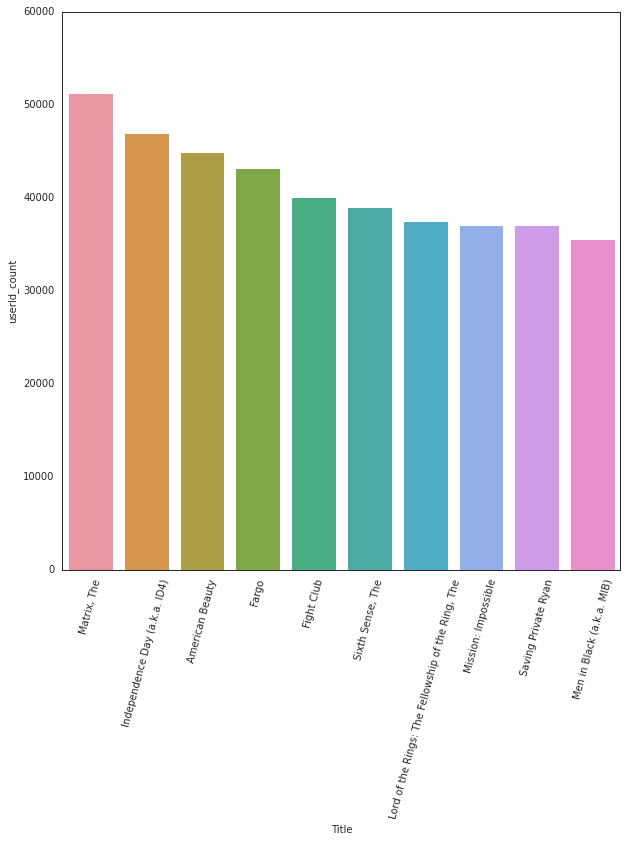

In [ ]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=75);
sns.barplot(title_count.index, title_count['userId']);
plt.ylabel('userId_count');
plt.xlabel('Title');

### EDA - 2

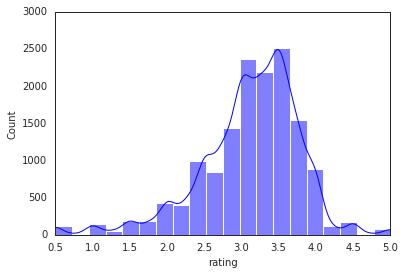

In [ ]:
# distribution of mean rating
sns.histplot(data=filtered_df, x=filtered_df.groupby("movieId").rating.mean(), kde=True, bins=20)

In [ ]:
filtered_df.head()

,userId,movieId,rating,timestamp,title,genres,year_released
0,1,653,3.0,2004-09-10 03:08:11,Dragonheart,Action|Adventure|Fantasy,1996
1,1,1358,4.0,2005-04-02 23:43:39,Sling Blade,Drama,1996
2,1,1525,3.0,2005-04-02 23:55:50,Warriors of Virtue,Action|Adventure|Children|Fantasy,1997
3,1,1584,3.5,2004-09-10 03:07:36,Contact,Drama|Sci-Fi,1997
4,1,1750,3.5,2005-04-02 23:56:41,Star Kid,Adventure|Children|Fantasy|Sci-Fi,1997


In [ ]:
#sns.jointplot(data=filtered_df,x='movieId', y='rating')
#sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

Conclusion of the graph - 

### EDA - 3 

Stats of the user

In [ ]:
# let's see how many films each person has in the dataframe
number_movies = filtered_df[["userId", "movieId"]].groupby("userId")["movieId"].count().\
                to_frame().reset_index().rename(columns={"movieId": "number_of_movies"})
print("Total number of movies watched by users", len(number_movies))
print("Max value of movies watched - ", number_movies["number_of_movies"].max())
print("Min value of movies watched - ", number_movies["number_of_movies"].min())
print("Mean value of the movies watched - ", number_movies["number_of_movies"].mean())

Total number of movies watched by users 130509
Max value of movies watched -  3688
Min value of movies watched -  1
Mean value of the movies watched -  70.06985725122405


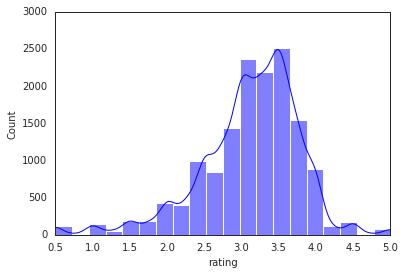

In [ ]:
sns.histplot(data=filtered_df, x=filtered_df.groupby("movieId").rating.mean(), kde=True, bins=20)

In [ ]:
number_movies.head()

,userId,number_of_movies
0,1,51
1,2,15
2,3,35
3,4,1
4,5,15


Conclusion of the stats - 

### EDA - 4

In [ ]:
movie_popularity = filtered_df['title'].value_counts().sort_values(ascending = False).head(25).index
dataset_filtered = filtered_df[filtered_df['title'].isin(movie_popularity)]
dataset_filtered.shape

(861658, 7)

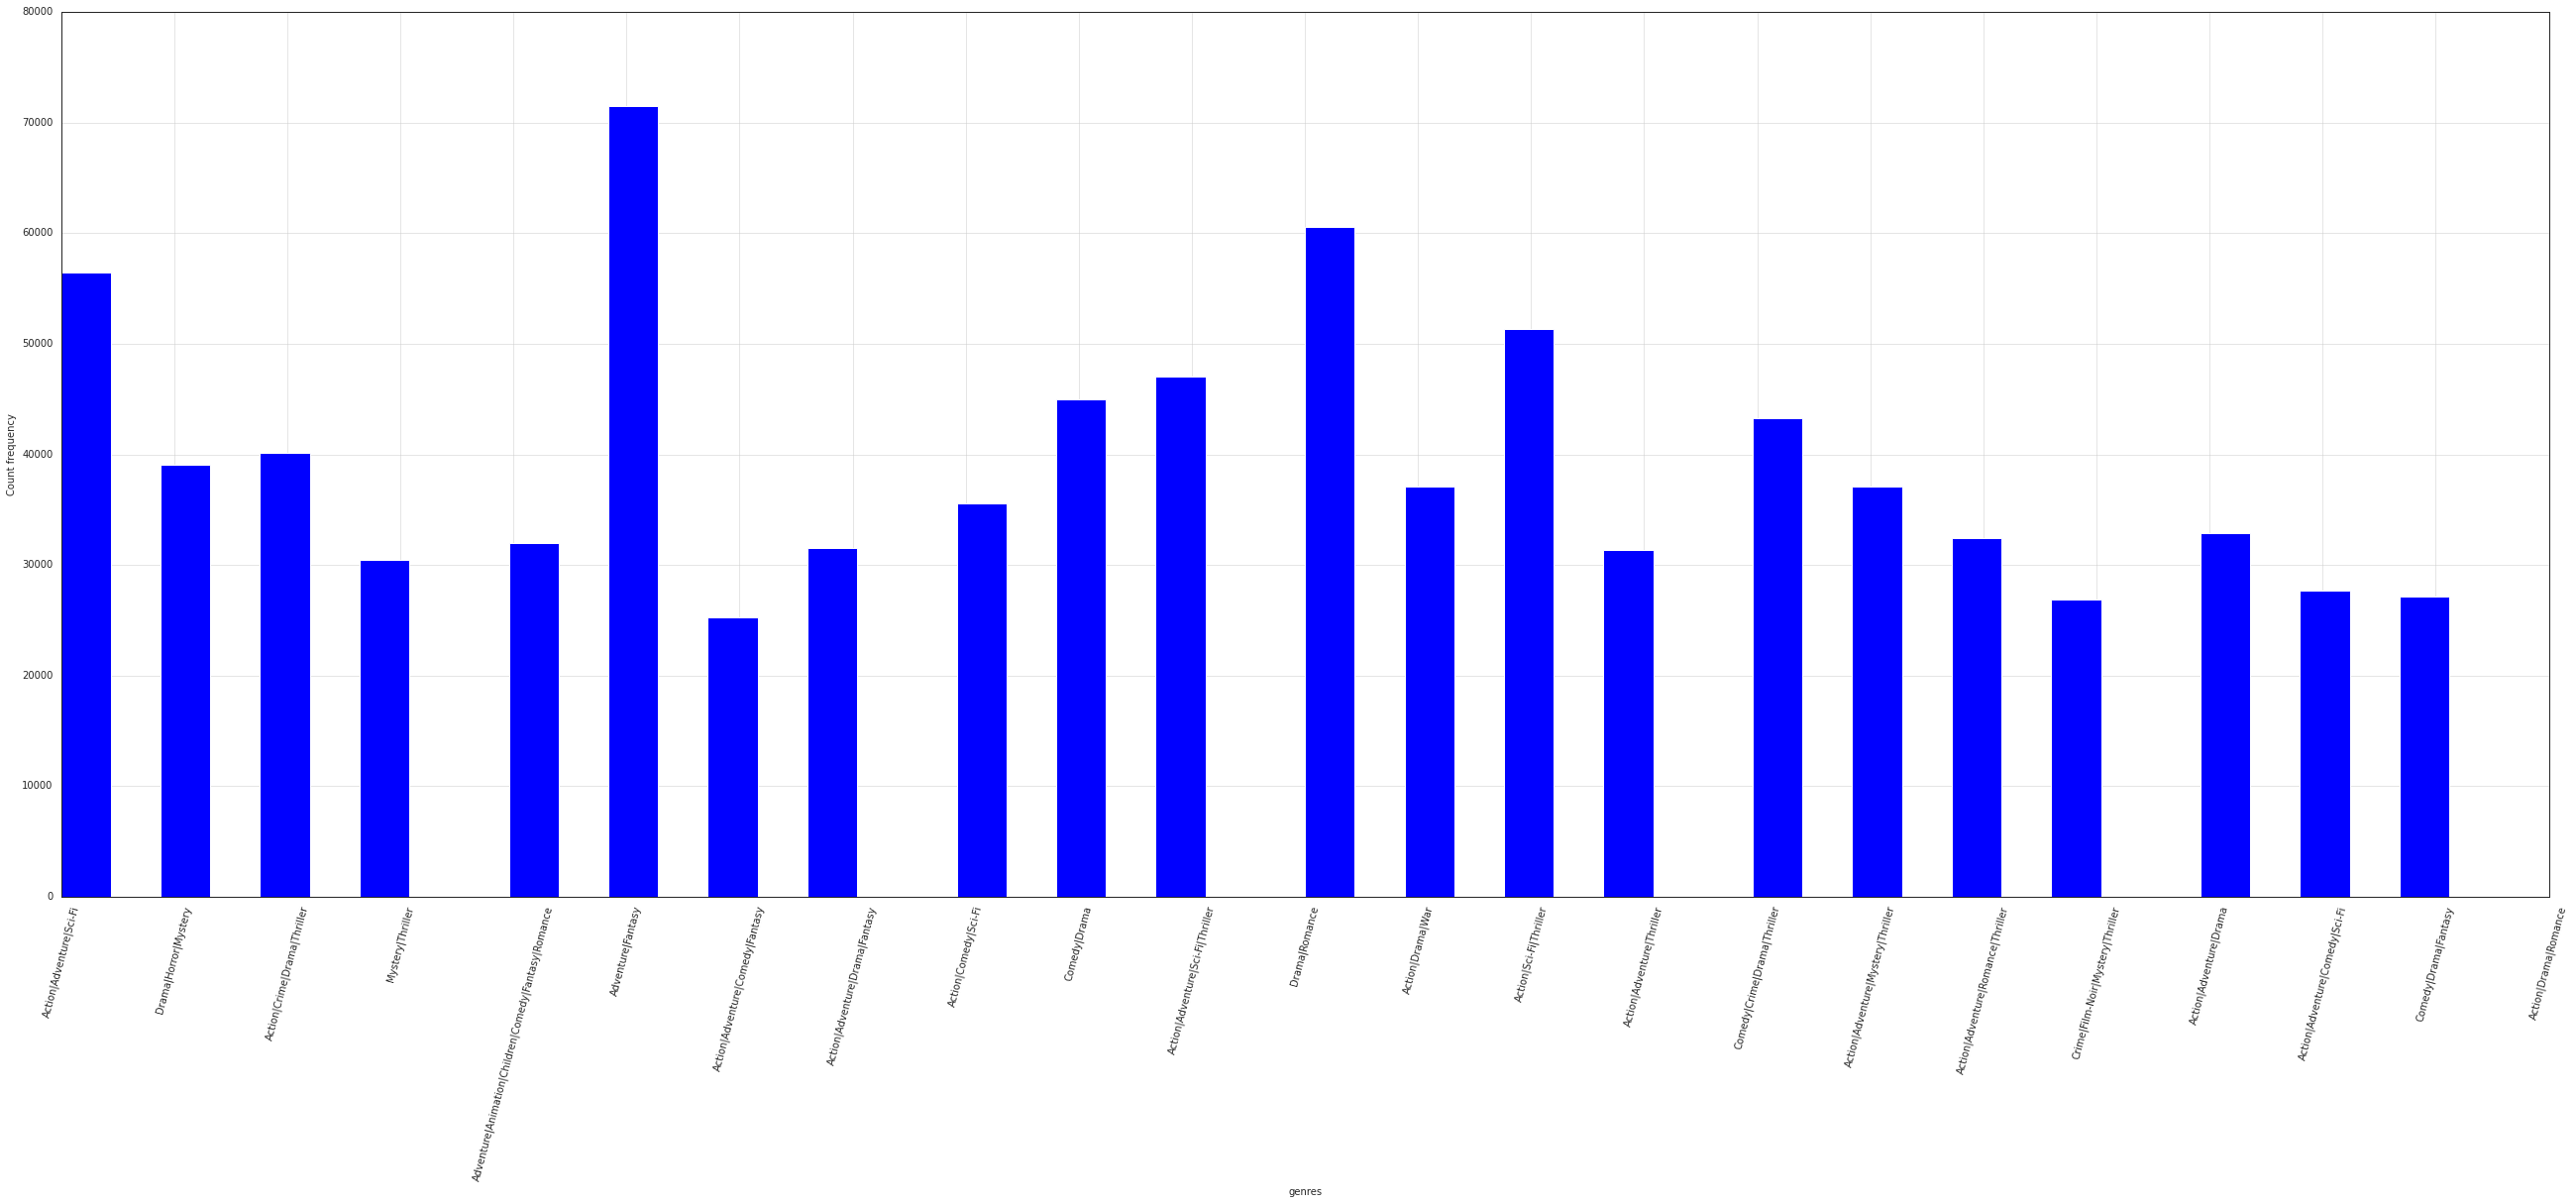

In [ ]:
plt.figure(figsize=(45,16))
dataset_filtered['genres'].hist(bins=50)
plt.xticks(rotation=75)
plt.ylabel('Count frequency')
plt.xlabel('genres');

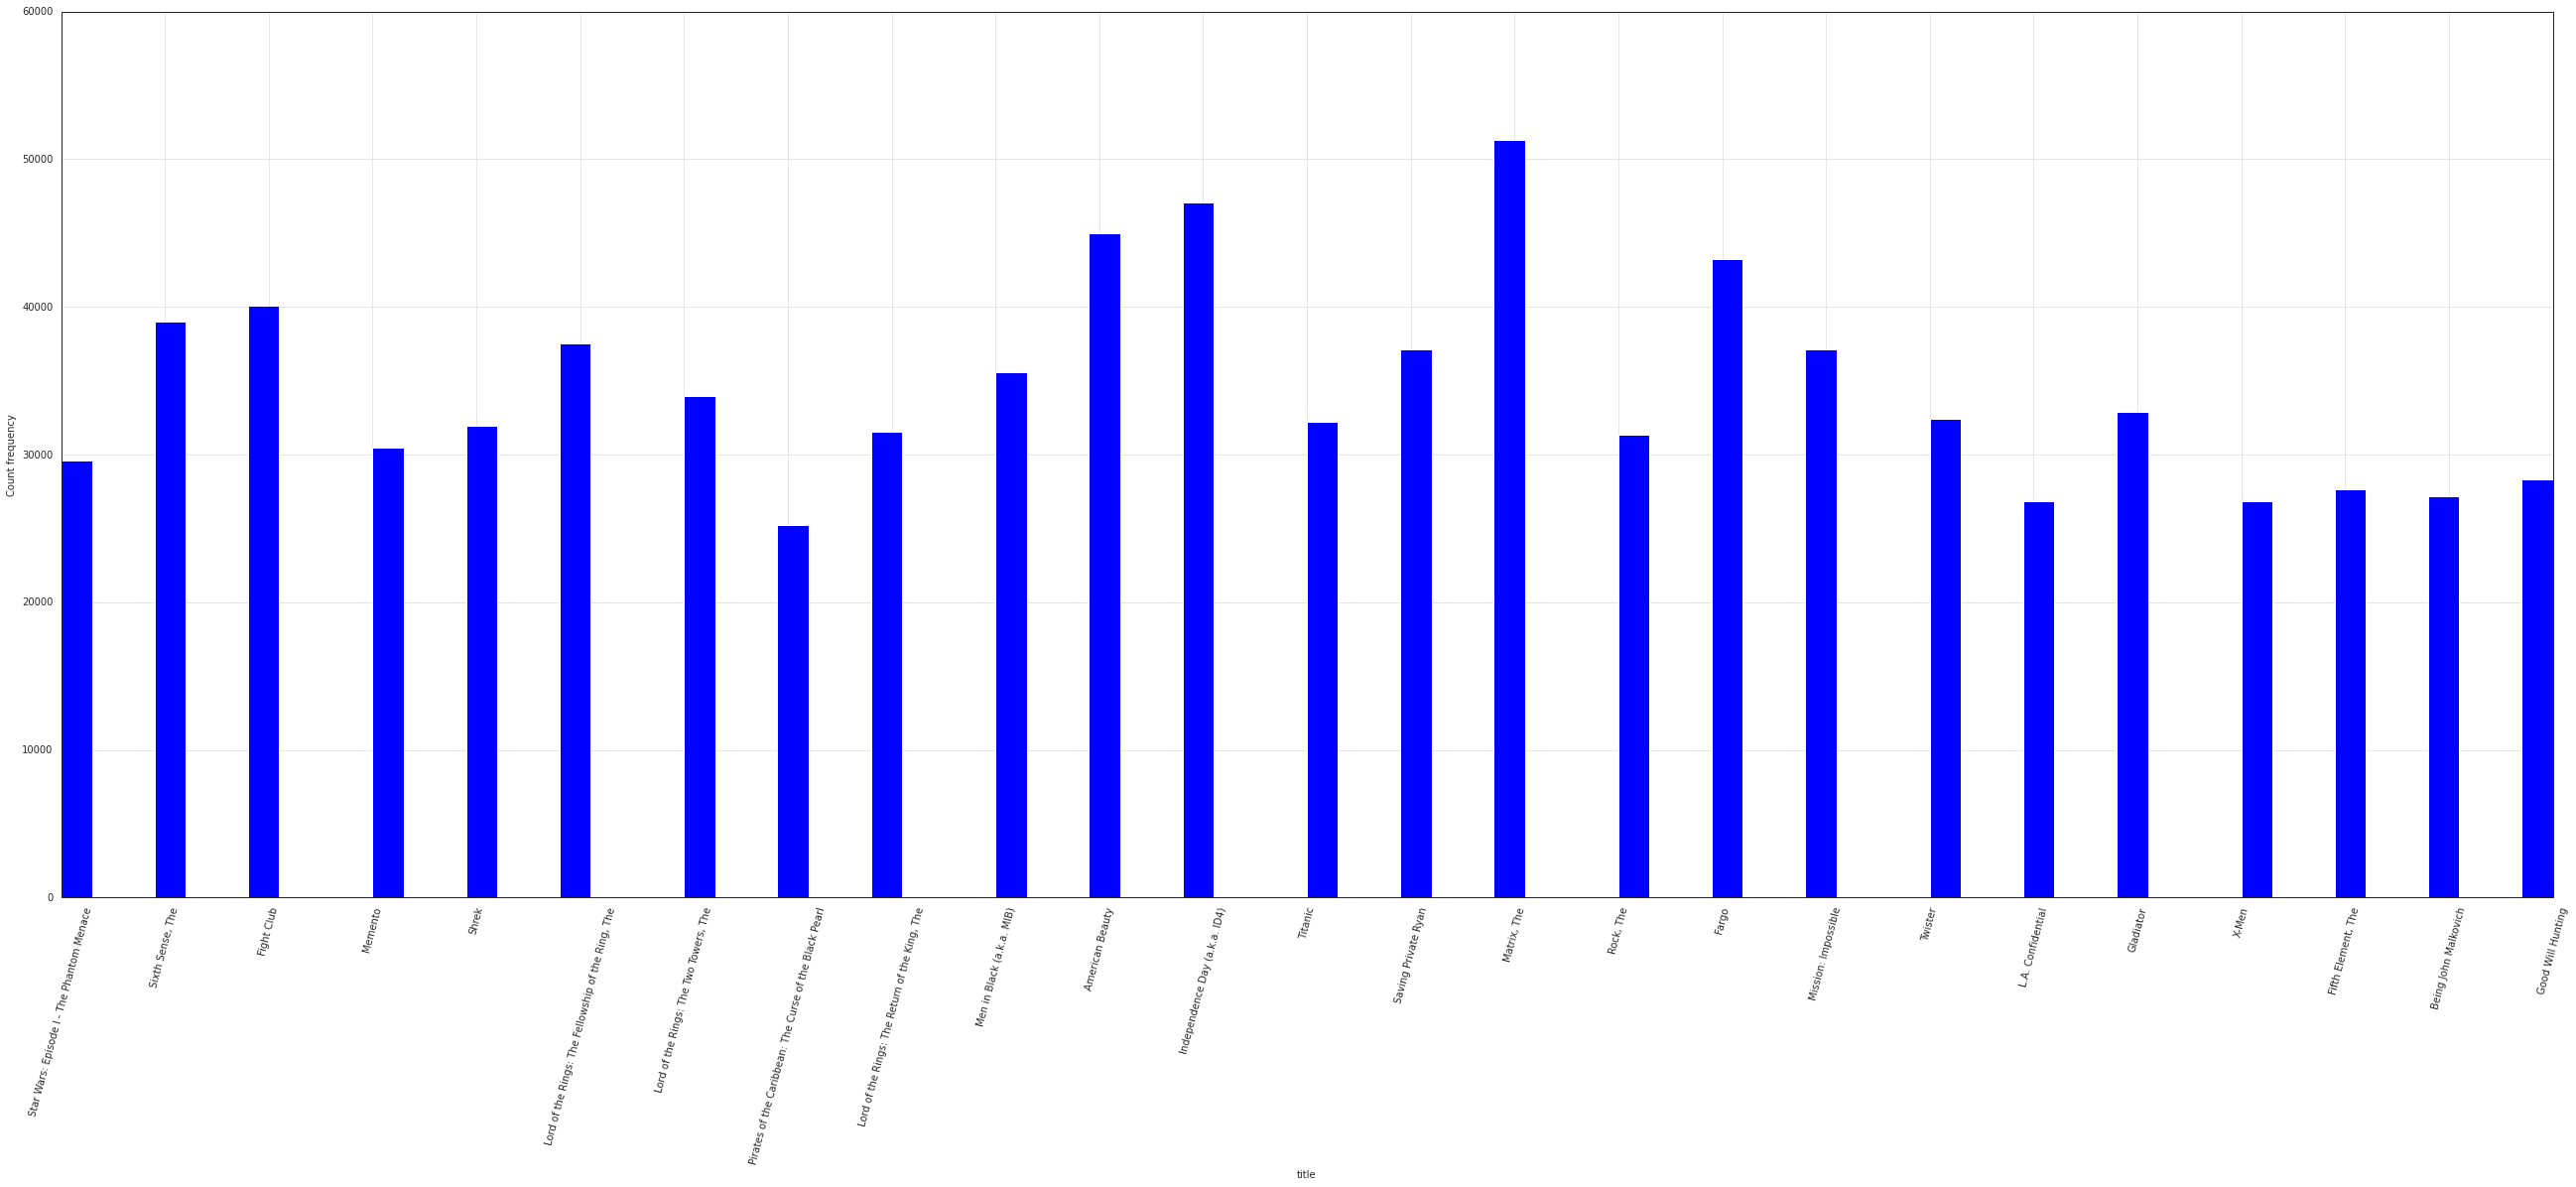

In [ ]:
plt.figure(figsize=(45,16))
dataset_filtered['title'].hist(bins=80)
plt.xticks(rotation=75);
plt.ylabel('Count frequency')
plt.xlabel('title');

Conclusion of the graph - 

### EDA - 5

The following graph depicts that can between the genres and the user that can be identify the highest values in the based on the genres.

In [ ]:
movie_1=filtered_df.groupby(['genres']).count()
movie_1 = movie_1.nlargest(10,'userId')
movie_1

,userId,movieId,rating,timestamp,title,year_released
genres,,,,,,
Drama,594273,594273,594273,594273,594273,594273
Comedy,581501,581501,581501,581501,581501,581501
Comedy|Romance,382507,382507,382507,382507,382507,382507
Comedy|Drama,357559,357559,357559,357559,357559,357559
Drama|Romance,353947,353947,353947,353947,353947,353947
Comedy|Drama|Romance,343988,343988,343988,343988,343988,343988
Crime|Drama,179382,179382,179382,179382,179382,179382
Drama|Thriller,176695,176695,176695,176695,176695,176695
Action|Adventure|Sci-Fi|Thriller,162145,162145,162145,162145,162145,162145


Conclusion of the table - 

### EDA - 6

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9144747 entries, 0 to 9144746
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   userId         int64  
 1   movieId        int64  
 2   rating         float64
 3   timestamp      object 
 4   title          object 
 5   genres         object 
 6   year_released  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 488.4+ MB


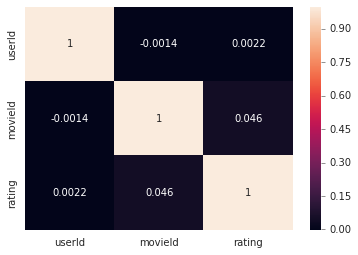

In [ ]:
corrMatrix = filtered_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# EDA
### load data
### Preprocess it ( median , outliers)
### Univaritate/bivariate/multivariate variable analysis ( distplot,boxplot,bargraphs, correlation plots)


(Vamsi, Sathish)

# (data preprocessing + Validation) KNN Modeling + Matrix conversion 
## Reading through the code and doing ( homework) 

(Swathi, Rahul)

# Google forms with data and collect data 

(Amulya, Deepa)

# Provide recommendations based on data collected

(Deepa, Amulya)

